In [1]:
import requests
import bs4
import pandas as pd

# Scraping NCRS SNOTEL locations

beautifulsoup only works in python 3 for some reason

In [2]:
def get_sites(state):
    """scrape a table of all snotel sites in a given state"""

    fmt = 'http://wcc.sc.egov.usda.gov/nwcc/yearcount?network=sntl&state={state}&counttype=statelist'
    url = fmt.format(state=state)
    r = requests.get(url)

    soup = bs4.BeautifulSoup(r.text, 'lxml')
    tables = soup.findAll('table')
    results = tables[4]

    thing = pd.read_html(str(results), header=0)
    sites = thing[0]

    site_id = sites.site_name.str.extract('\((\d+)\)')
    site_id.name = 'site_id'
    sites = sites.set_index(site_id)
    
    return sites

In [3]:
sites = pd.concat(get_sites(state) for state in ('OR', 'WA'))
sites

,ntwk,state,site_name,ts,start,lat,lon,elev,county,huc
site_id,,,,,,,,,,
302,SNTL,OR,Aneroid Lake #2 (302),NaN,1980-October,45.21,-117.19,7400,Wallowa,West Fork Wallowa River-Wallowa River (1706010...
1000,SNTL,OR,Annie Springs (1000),NaN,2000-September,42.87,-122.17,6010,Klamath,Upper Annie Creek (180102030101)
304,SNTL,OR,Arbuckle Mtn (304),NaN,1978-October,45.19,-119.25,5770,Morrow,Upper Fivemile Creek (170702020604)
1166,SNTL,OR,Bear Grass (1166),NaN,2011-September,44.33,-122.09,4720,Linn,Smith River (170900040203)
331,SNTL,OR,Beaver Reservoir (331),NaN,1980-June,45.15,-118.22,5150,Union,Upper Beaver Creek (170601040301)
341,SNTL,OR,Big Red Mountain (341),NaN,1980-June,42.05,-122.85,6050,Jackson,Upper Little Applegate River (171003090301)
343,SNTL,OR,Bigelow Camp (343),NaN,1980-June,42.08,-123.34,5130,Josephine,Sturgis Fork Carberry Creek (171003090105)
344,SNTL,OR,Billie Creek Divide (344),NaN,1978-October,42.41,-122.27,5280,Klamath,Seldom Creek (180102030201)
351,SNTL,OR,Blazed Alder (351),NaN,1980-June,45.43,-121.86,3650,Clackamas,Clear Creek-Sandy River (170800010102)


In [4]:
sites.to_pickle('snotels.pickle')

In [5]:
import pandas as pd
sites = pd.read_pickle('snotels.pickle')

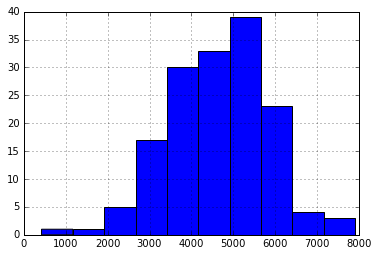

In [18]:
%matplotlib inline

sites['elev'].hist()

# plot the locations

In [6]:
locs = sites[['lat','lon']]

In [7]:
import gmaps

<IPython.core.display.Javascript object>

In [8]:
gmaps.heatmap(locs.values)

In [57]:
def gen_labels(sites):
    for i,*row in sites[['site_name', 'elev']].itertuples():
        yield "<b>%s</b>: %d ft" % tuple(row)
        
labels = list(gen_labels(sites))

In [58]:
#labels = sites[['site_name', 'elev']].values
gmaps.pinmap(locs.values, labels)

In [22]:
sites.itertuples()

In [33]:
sites.columns

Index(['ntwk', 'state', 'site_name', 'ts', 'start', 'lat', 'lon', 'elev',
       'county', 'huc'],
      dtype='object')

In [40]:
next(sites.itertuples())

Pandas(Index='302', ntwk='SNTL', state='OR', site_name='Aneroid Lake #2 (302)', ts=nan, start='1980-October', lat=45.210000000000001, lon=-117.19, elev=7400, county='Wallowa', huc='West Fork Wallowa River-Wallowa River (170601050101)')

In [42]:
type(_40)

pandas.core.frame.Pandas

In [44]:
sites.itertuples?

In [45]:
_40.site_name

'Aneroid Lake #2 (302)'

In [36]:
len(_35)

11

In [38]:

len(_33)

10

In [24]:
next(_)

Pandas(Index='302', ntwk='SNTL', state='OR', site_name='Aneroid Lake #2 (302)', ts=nan, start='1980-October', lat=45.210000000000001, lon=-117.19, elev=7400, county='Wallowa', huc='West Fork Wallowa River-Wallowa River (170601050101)')

In [32]:
_24.shape

AttributeError: 'Pandas' object has no attribute 'shape'

In [27]:
type(_24)

pandas.core.frame.Pandas

In [28]:
sites.to_string?

In [31]:
"{ntwk}".format(**dict(_24))

ValueError: dictionary update sequence element #0 has length 3; 2 is required

In [21]:
sites.itertuples?